# [Title]
#### by Group 19 (Theo Marill, Finn Piney, Cecilia Xu, Hayoung Cho)

## Introduction
### Background  

This project aims to explore player behavior on a dedicated Minecraft server managed by the Pacific Laboratory for Artificial Intelligence (PLAI) at the University of British Columbia (UBC). Minecraft offers an open-world environment where players have significant freedom to explore, build, and interact.

The PLAI research group collects data on how people play to support the development of embodied AI. A key challenge for the researchers is recruitment efficiency: they need to identify and attract specific "kinds" of players (e.g., "Pros" or "Veterans") who might contribute high-quality data. However, relying solely on self-reported surveys can be inefficient. This project explores an alternative approach: using behavioral data from server logs to identify player expertise. If specific experience levels correlate with specific playing times (e.g., "Pros" tend to play late at night, while "Beginners" play in the afternoon), the research team could optimize their recruitment efforts by targeting those specific time windows.

### Research Question  
Can the start time and end time of player sessions be used to accurately predict a player's self‐reported experience level?

This question is important for understanding whether behavioural patterns, such as when players choose to play, can distinguish between different experience groups. If certain session patterns are characteristic of experienced or inexperienced players, this information could help server administrators better understand player segmentation and optimize recruitment and server engagement strategies.

### Data
The data of interest for this project is a player and session information of gamers using a free Minecraft server hosted and monitored by the Pacific Laboratory for Artificial Intelligence at UBC studying player behaviours to develop embodied AI. We have two `.csv` files called `players` and `sessions` with 196 observations and 7 variables, and 1535 observations and 5 variables, respectively. 

In [1]:
# run this cell
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [22]:
# run this cell
raw_players <- read_csv("https://raw.githubusercontent.com/Booch58/individual_contribution/refs/heads/main/players.csv", show_col_types = FALSE)
raw_sessions <- read_csv("https://raw.githubusercontent.com/Booch58/individual_contribution/refs/heads/main/sessions.csv", show_col_types = FALSE)
raw_players
raw_sessions

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [3]:
glimpse (raw_players)

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


##### `players.csv` Variables:  

- `experience` (character): The player's self-reported Minecraft experience level, categorized as Beginner, Amateur, Regular, Pro, or Veteran.

- `subscribe` (logical): Whether the player subscribes to the newsletter.

- `hashedEmail` (character): A unique, hashed identifier for each player.

- `played_hours` (double): The total hours a player has spent on the server (ranging from 0 to 223.1 hours).

- `name` (character): The player's in-game username.

- `gender` (character): The player's gender.

- `Age` (double): The player's age in years (ranging from 9 to 58, contains 2 NAs).

In [4]:
glimpse (raw_sessions)

Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…


##### `sessions.csv` Variables:  

- `hashedEmail` (character): The unique identifier linking sessions to players in the `players.csv` file.

- `start_time` (character): The session start time, recorded in a human-readable date and time format. 

- `end_time` (character): The session end time, also in a human-readable format.

- `original_start_time` (double): The start time as a numerical Unix timestamp.

- `original_end_time` (double): The end time as a numerical Unix timestamp.

To answer the research question, these datasets will be joined using the `hashedEmail` key. From the timestamp data, we will derive numeric session start times and end times expressed as minutes past midnight. These time‐based variables will be used as predictor features in a k‐Nearest Neighbors (k-NN) classification model, with player experience level serving as the outcome variable. During data cleaning, we will account for irregularities such as sessions that span midnight by adjusting end times accordingly. This ensures that session timing variables are accurately represented for use in classification modelling.

## Methods and Results
Loading data again, packages have already been loaded in Introduction.

In [5]:
raw_players <- read_csv("https://raw.githubusercontent.com/Booch58/individual_contribution/refs/heads/main/players.csv", show_col_types = FALSE)
raw_sessions <- read_csv("https://raw.githubusercontent.com/Booch58/individual_contribution/refs/heads/main/sessions.csv", show_col_types = FALSE)
raw_players
raw_sessions

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


#### Tidying

Let's standardize the column naming as well as separate the start/end *date* and the *time* of `start_time`/`end_time`.

In [6]:
players <- raw_players |>
    rename(hashed_email = hashedEmail, age = Age)|>
    mutate(experience = as_factor(experience), gender = as_factor(gender), hashed_email = fct_reorder(hashed_email, played_hours, .fun = sum))
sessions <- raw_sessions |>
    rename(hashed_email = hashedEmail) |>
    separate(col = start_time, into = c('start_date', 'start_time'), sep = " ")|>
    separate(col = start_time, into = c('start_hr', 'start_m'), sep = ":") |>
    mutate(start_time = as.double(start_hr) * 60 + as.double(start_m)) |>
    separate(col = end_time, into = c('end_date', 'end_time'), sep = " ")|>
    separate(col = end_time, into = c('end_hr', 'end_m'), sep = ":") |>
    mutate(end_time = as.double(end_hr) * 60 + as.double(end_m)) |>
    select(-start_hr, -start_m, -end_hr, -end_m)
players
sessions

experience,subscribe,hashed_email,played_hours,name,gender,age
<fct>,<lgl>,<fct>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashed_email,start_date,end_date,original_start_time,original_end_time,start_time,end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,30/06/2024,1.71977e+12,1.71977e+12,1092,1104
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,17/06/2024,1.71867e+12,1.71867e+12,1413,1426
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,25/07/2024,1.72193e+12,1.72193e+12,1054,1077
⋮,⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024,28/07/2024,1.72218e+12,1.72218e+12,936,957
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024,25/07/2024,1.72189e+12,1.72189e+12,375,382
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024,20/05/2024,1.71617e+12,1.71617e+12,146,165


Here, to account for the fact that some sessions will span the midnight mark, we adjust the endtime to be **minutes past the midnight most recently before the start_time.**

In [7]:
sessions_mid <- sessions |>
    filter(end_date != start_date) |>
    mutate(end_time = end_time + 1440)

sessions_day <- sessions |>
    filter(end_date == start_date)

sessions_adj <- sessions_mid |>
    bind_rows(sessions_day)

sessions_adj

hashed_email,start_date,end_date,original_start_time,original_end_time,start_time,end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,12/05/2024,13/05/2024,1.71556e+12,1.71556e+12,1403,1454
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,29/06/2024,30/06/2024,1.71970e+12,1.71971e+12,1286,1440
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,27/07/2024,28/07/2024,1.72212e+12,1.72213e+12,1410,1463
⋮,⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024,28/07/2024,1.72218e+12,1.72218e+12,936,957
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024,25/07/2024,1.72189e+12,1.72189e+12,375,382
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024,20/05/2024,1.71617e+12,1.71617e+12,146,165


### Summary of Relevant Data
Here we have: 

1. Calculated the mean session length for each experience level.
2. Given counts of all players according to experience level and who have contributed to the sessions data.
3. Made histograms identifying count of start times for each experience level (Notice varying scales across experience levels! This is done to make less populated experience levels more visible).

In [8]:
named_sessions <- sessions_adj |>
    merge(players)

lengths <- named_sessions |>
    mutate(length = end_time - start_time) |>
    select(length, experience) |>
    group_by(experience) |>
    summarize(mean_session_length = mean(length))

populations <- named_sessions |>
    group_by(experience) |>
    summarize(count = n()) |>
    select(experience, count)


start_grid <- named_sessions |>
    ggplot(aes(x=start_time, fill = factor(experience, levels = c("Beginner","Amateur","Regular","Pro","Veteran")))) +
        geom_histogram(binwidth = 120) +
        facet_grid(rows = vars(experience), scale = "free_y") +
        labs(x="Session Start Time \n(mins past 00:00)",
             y="Count", 
             fill="Player Experience Level") +
        theme(text = element_text(size = 20))


In [9]:
named_sessions

hashed_email,start_date,end_date,original_start_time,original_end_time,start_time,end_time,experience,subscribe,played_hours,name,gender,age
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>,<dbl>,<chr>,<fct>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,22/05/2024,23/05/2024,1.71642e+12,1.71642e+12,1392,1453,Regular,TRUE,1.5,Isaac,Male,20
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,23/05/2024,23/05/2024,1.71642e+12,1.71643e+12,22,67,Regular,TRUE,1.5,Isaac,Male,20
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,28/06/2024,28/06/2024,1.71955e+12,1.71955e+12,268,298,Pro,FALSE,0.4,Lyra,Male,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,27/07/2024,27/07/2024,1.72204e+12,1.72204e+12,49,76,Amateur,TRUE,56.1,Dana,Male,23
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,14/09/2024,14/09/2024,1.72633e+12,1.72633e+12,933,942,Amateur,TRUE,0.1,Fatima,Male,17
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,26/04/2024,26/04/2024,1.71412e+12,1.71413e+12,551,623,Beginner,TRUE,1.1,Caden,Male,20


**fig. 1**

In [10]:
lengths

experience,mean_session_length
<fct>,<dbl>
Pro,62.58974
Veteran,42.64706
Amateur,33.02198
Regular,83.34363
Beginner,29.55660


**fig. 2**

In [11]:
populations

experience,count
<fct>,<int>
Pro,39
Veteran,51
Amateur,819
Regular,518
Beginner,106


**fig. 3**

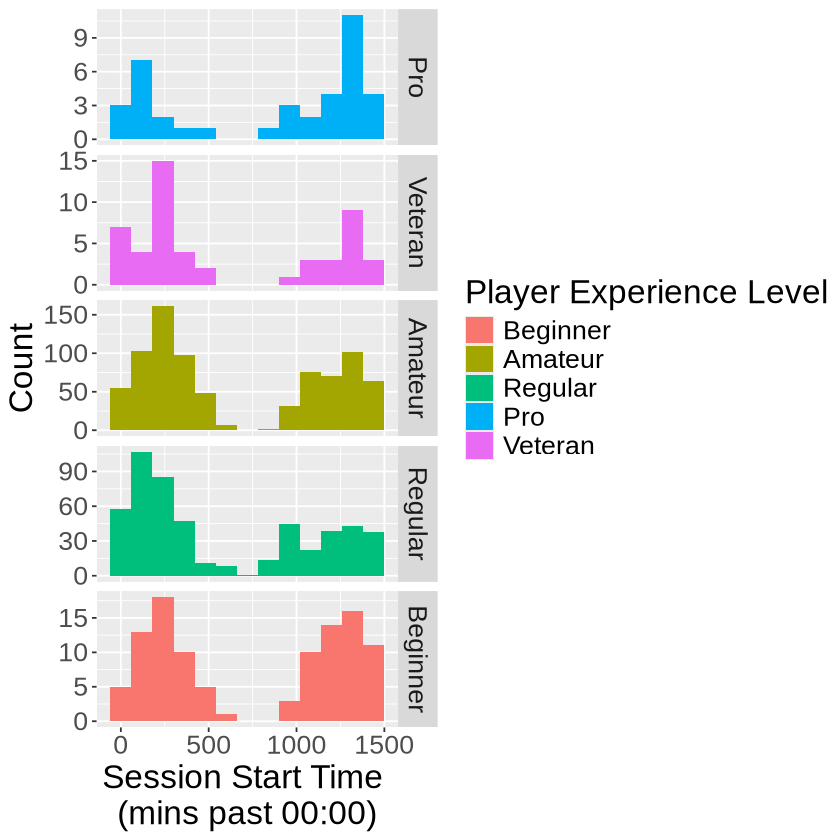

In [12]:
start_grid

### Visualization for Analysis

In [13]:
# run this cell
options(repr.plot.width = 9, repr.plot.height = 8)

start_vs_end <- ggplot(named_sessions, aes(x=start_time, y=end_time, colour = factor(experience, levels = c("Beginner","Amateur","Regular","Pro","Veteran")))) +
    geom_point(alpha = 0.4) +
    labs(title="Start and End Times of Individual Sessions \nat Different Experience Levels",
         x="Start Time (mins past 00:00)",
         y="End Time (mins past 00:00)",
         colour="Experience") +
    xlim(0,1500) +
    theme(text = element_text(size = 20)) +
    scale_color_brewer(palette = "Dark2")

____
Here we have visualized each player's sessions as a point on this graph where its start end time is on plotted on the x and y axes. Each point is also coloured according the player's experience. Interpreting the straight line, we make out that all points on the line of y = x are sessions that lasted 0 minutes and every point progressively higher above the line is a progressively longer session.  

**fig. 4**

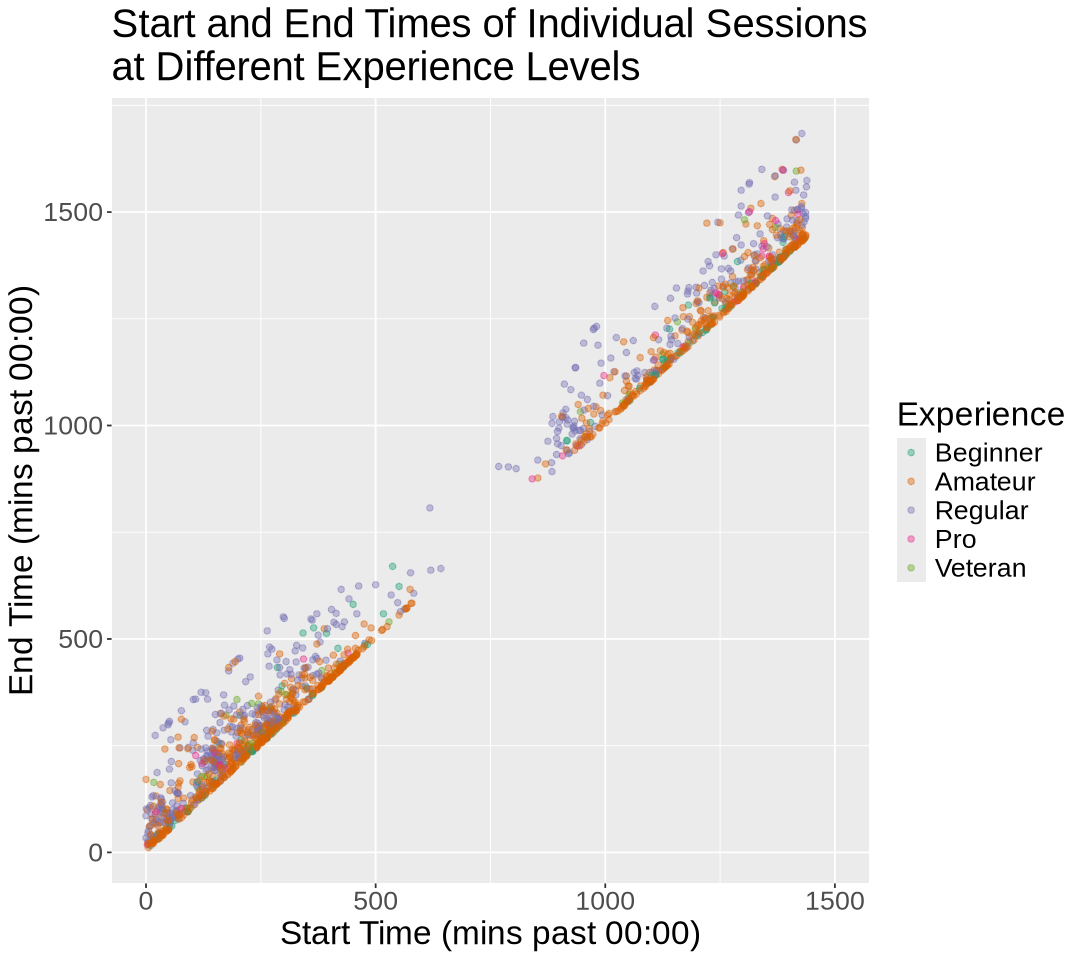

In [14]:
start_vs_end

____
### Data Analysis

In [15]:
set.seed(1122)
named_split <- initial_split(named_sessions, 0.60)
named_training <- training(named_split)
named_testing <- testing(named_split)

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))
named_vfold <- vfold_cv(named_training, v = 10, strata = experience)

named_recipe <- recipe(experience ~ start_time + end_time, data = named_training) |>
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())
named_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                    set_engine("kknn") |>
                    set_mode("classification")
named_fit <- workflow() |>
    add_recipe(named_recipe) |>
    add_model(named_spec) |>
    tune_grid(resamples = named_vfold, grid = k_vals) |>
    collect_metrics()

In [16]:
k_plot <- named_fit |>
    filter(.metric == "accuracy") |>
    ggplot(aes(x=neighbors,y=mean)) +
        geom_point() +
        geom_line() +
        labs(x="k-Neighbours",
             y="Accuracy (%)")

____
Here we found that the best K value of neighbours was around 21:

**fig. 5**

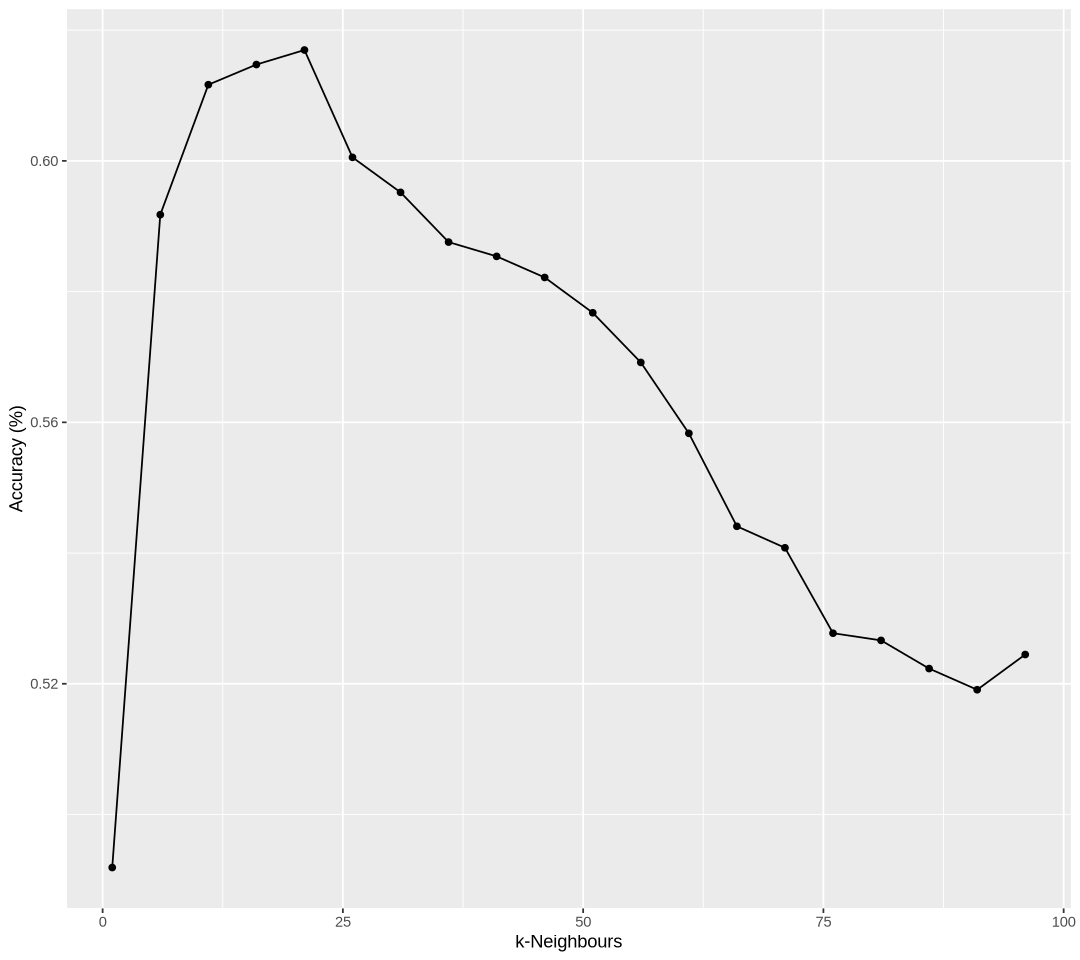

In [17]:
k_plot

____

In [18]:
named_tuned <- nearest_neighbor(weight_fun = "rectangular", neighbors = 21) |>
                    set_engine("kknn") |>
                    set_mode("classification")
named_fit2 <- workflow() |>
    add_recipe(named_recipe) |>
    add_model(named_tuned) |>
    fit(data = named_training)

named_evaluation <- named_fit2 |>
    predict(named_testing) |>
    bind_cols(named_testing) 

accuracy <- named_evaluation |>
    metrics(truth = experience, estimate = .pred_class) |>
    filter(.metric == "accuracy") |>
    select(-.estimator)

conf <- named_evaluation |>
    conf_mat(truth = experience, estimate = .pred_class)

After creating our final analysis workflow, our accuracy on the testing data we set aside. was:

In [19]:
pull(accuracy)

[1] 0.6416938

____

Here is also the confusion matrix indicating the number of predictions compared to the true observations:

**fig. 6**

In [20]:
conf

          Truth
Prediction Pro Veteran Amateur Regular Beginner
  Pro        0       0       0       0        0
  Veteran    0       0       0       0        0
  Amateur   11      15     276      93       33
  Regular    3       2      58     118        5
  Beginner   0       0       0       0        0

In [21]:
populations

experience,count
<fct>,<int>
Pro,39
Veteran,51
Amateur,819
Regular,518
Beginner,106


____

## Discussion

Our methods tried to see if the start time and end time of gaming sessions could be predictive of the user's experience level. Our exploratory figures regarding start times, particularly figure 3, indicated that Pro users had peak start times of 1300 minutes past 00:00 (21:40), veterans, amateurs, and beginners at 250 minutes past 00:00 (04:10), and regular users at 200 minutes past 00:00 (03:20). Taking this together with our results from figure 1 which displayed mean durations of sessions by experience level, we initally expected that our results would be suggestive of allocating resources to recruit regular and pro users at 03:20 and 21:40, respectively. However, our analysis results suggested elsewise.

Looking at our analysis results in figure 6, we may conclude that start and end times of a gaming session are not predictive in the gaming experience of a user. Thus, our inital expectations were not met. However, taking a closer look at the matrix can reveal the imperfections in our model that could suggest an alternative perspective.

Ultimately, our classification model lacked accuracy with a value of 0.64. This resulted in 0 correct predictions regarding the experience levels pro, veteran, and beginner out of the 39, 51, and 106 users, respectively (figure 2, figure 6). As for the beginner class, although there were some correct predictions, the precision and recall values come out to be 0.63 and 0.56, repectfully. This tells us that while there were correct predictions, the overall quality of correct predictions is not high and many cases were still missed. In the case of the amateur class, the precision and recall values are 0.65 and 0.83, respectively. This tells us that while many cases were correctly recognized, many are false alarms and so the quality of correct predictions is low. 
Such results are likely to have come from an imbalance in classes. As you can see in figure 2, the amateur and regular classes had a much higher sample size than the pro, veteran, and beginner classes, resulting in a biased dataset. This bias is naturally represented in our matrix (figure 6). Additionally, figure 3 shows that many classes have a peak around 04:10 and 21:40, suggesting that start times may not have been the best predictor to classify amongst experience levels, although we also included end time as a predictor in our model.

Overall, the results of our classification model were not expected. As mentioned, we initially expected that the start and end times of the users would be predictive of the experience level, thus allowing us to infer that recruitment efforts should be targeting around 03:20 and 21:40 to most effectively gather data. However, our group underestimated the differences in class size and overestimated the slight differences in peak start times (figure 3), leading to our results. 


### 1. Summary of what we found
<p>Through our methods, we sought to explore whether the players' self-reported experience level is predictive of (1) the length of time they play and (2) the time of their sessions. The results show that ____ </p>

### 2. Discussion of if this was expected
<p>These results are _____ to what we expected. Before conducting our analysis, we predicted that higher reported experience levels should be predictive of longer session lengths in this dataset. Intuitively, we felt that this would make sense as more experienced players have a higher level of dedication to Minecraft, and would therefore play more hours. </p>

### 3. Discussion of impact of findings
<p>
    knowing the experience levels of players could be predictive of longer sessions to investigate which 'kind' of player would likely contribute larger amounts of data. Based on our findings, we believe that players of ____ level tend to play longer amounts, resulting in a larger amount of data collected by the research team. This helps the research team and can impact their recruiting methods as they will be able to allocate their resources in targeting ____ players, such as by _____ or ______. </p>

### 4. Discussion of future questions findings could lead to